In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# Experimental pulses from LAGO (Red Pitaya)

In [57]:
FILE_NAME = './data/longTrace.txt'
PULSE_LEN = 64

In [58]:
f = open(FILE_NAME, 'r')
fullTrace = []
for line in f:
    fullTrace.append(int(line))

f.close()

91


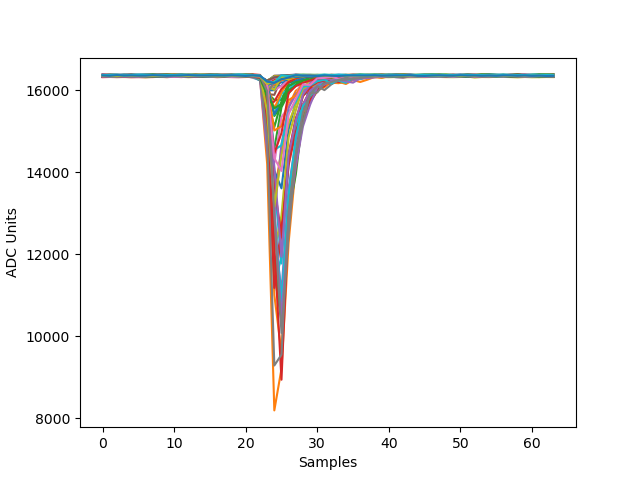

In [68]:
%matplotlib widget
x = np.linspace(0,PULSE_LEN - 1, PULSE_LEN)

cnt = 0

df = {}

for i in range(len(fullTrace)//PULSE_LEN):
    thisTrace = fullTrace[i*PULSE_LEN:(i+1)*PULSE_LEN] 
    if 0 not in thisTrace:
        df[i] = thisTrace
        plt.plot(x,thisTrace)
        cnt += 1
        

print(cnt)

plt.xlabel("Samples")
plt.ylabel("ADC Units")

plt.show()

In [69]:
dfPulses = pd.DataFrame(df)
dfPulses = dfPulses.T
dfPulses

0      1      2      3      4      5      6      7      8      9   ...  \
0   16343  16343  16333  16339  16330  16337  16341  16344  16337  16340  ...   
1   16347  16348  16352  16354  16351  16357  16353  16350  16353  16352  ...   
2   16347  16357  16354  16354  16346  16344  16345  16347  16349  16350  ...   
3   16351  16345  16343  16356  16345  16338  16346  16337  16344  16341  ...   
4   16366  16369  16370  16374  16373  16368  16370  16374  16378  16381  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  16335  16338  16340  16338  16338  16338  16338  16343  16342  16339  ...   
96  16366  16360  16369  16358  16370  16371  16367  16361  16366  16369  ...   
97  16350  16340  16339  16350  16348  16342  16354  16348  16348  16351  ...   
98  16366  16373  16377  16360  16368  16376  16372  16369  16366  16367  ...   
99  16356  16349  16364  16355  16357  16352  16352  16363  16357  16349  ...   

       54     55     56     57     58     59     60     61     62     63  
0   16340  16345  16354  16345  16345  16338  16336  16351  16351  16343  
1   16351  16338  16348  16356  16346  16355  16353  16348  16360  16354  
2   16359  16367  16353  16356  16355  16355  16355  16353  16367  16350  
3   16347  16362  16358  16347  16347  16350  16351  16353  16350  16354  
4   16370  16368  16373  16364  16369  16371  16371  16365  16362  16375  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
95  16337  16339  16337  16345  16338  16336  16338  16343  16341  16340  
96  16353  16360  16357  16356  16363  16360  16358  16359  16361  16359  
97  16348  16358  16354  16348  16349  16353  16358  16353  16354  16350  
98  16361  16360  16371  16361  16366  16367  16362  16360  16370  16362  
99  16354  16349  16358  16358  16349  16357  16348  16352  16345  16347  

[91 rows x 64 columns]

In [230]:
dfPulses["avg"] = dfPulses.mean(axis = 1)
dfPulses["std"] = dfPulses[dfPulses.columns[:PULSE_LEN]].std(axis = 1)
dfPulses["baseline"] = dfPulses[dfPulses.columns[:15]].mean(axis = 1)
dfPulses["amplitude"] = dfPulses["baseline"] - dfPulses[dfPulses.columns[:PULSE_LEN]].min(axis = 1)
dfPulses

0      1      2      3      4      5      6      7      8      9  ...  \
0   16343  16343  16333  16339  16330  16337  16341  16344  16337  16340  ...   
1   16347  16348  16352  16354  16351  16357  16353  16350  16353  16352  ...   
2   16347  16357  16354  16354  16346  16344  16345  16347  16349  16350  ...   
3   16351  16345  16343  16356  16345  16338  16346  16337  16344  16341  ...   
4   16366  16369  16370  16374  16373  16368  16370  16374  16378  16381  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  16335  16338  16340  16338  16338  16338  16338  16343  16342  16339  ...   
96  16366  16360  16369  16358  16370  16371  16367  16361  16366  16369  ...   
97  16350  16340  16339  16350  16348  16342  16354  16348  16348  16351  ...   
98  16366  16373  16377  16360  16368  16376  16372  16369  16366  16367  ...   
99  16356  16349  16364  16355  16357  16352  16352  16363  16357  16349  ...   

       58     59     60     61     62     63           avg          std  \
0   16345  16338  16336  16351  16351  16343  15842.358416    44.012441   
1   16346  16355  16353  16348  16360  16354  15366.773915  1457.451394   
2   16355  16355  16355  16353  16367  16350  15781.197219   278.844014   
3   16347  16350  16351  16353  16350  16354  15859.176774    20.688928   
4   16369  16371  16371  16365  16362  16375  15878.822375    29.115107   
..    ...    ...    ...    ...    ...    ...           ...          ...   
95  16338  16336  16338  16343  16341  16340  15730.160096   396.655751   
96  16363  16360  16358  16359  16361  16359  15522.212952  1027.396079   
97  16349  16353  16358  16353  16354  16350  15859.591035    31.256868   
98  16366  16367  16362  16360  16370  16362  15877.276999    30.609188   
99  16349  16357  16348  16352  16345  16347  15863.820712    31.413647   

        baseline    amplitude  
0   16338.133333   222.133333  
1   16351.066667  8159.066667  
2   16350.600000  1774.600000  
3   16343.400000   132.400000  
4   16371.800000   207.800000  
..           ...          ...  
95  16338.600000  2309.600000  
96  16365.733333  6285.733333  
97  16348.066667   199.066667  
98  16368.866667   182.866667  
99  16356.000000   182.000000  

[91 rows x 68 columns]

In [233]:
dfPulsesNorm = dfPulses[dfPulses.columns[:PULSE_LEN]].copy()
dfPulsesNorm = (dfPulsesNorm.T - dfPulses['baseline']).T
dfPulsesNorm = dfPulsesNorm.divide(dfPulses['amplitude'], axis = 0)
dfPulsesNorm = dfPulsesNorm*(-1)
dfPulsesNorm

0         1         2         3         4         5         6   \
0  -0.021909 -0.021909  0.023109 -0.003902  0.036615  0.005102 -0.012905   
1   0.000498  0.000376 -0.000114 -0.000360  0.000008 -0.000727 -0.000237   
2   0.002029 -0.003606 -0.001916 -0.001916  0.002592  0.003719  0.003156   
3  -0.057402 -0.012085  0.003021 -0.095166 -0.012085  0.040785 -0.019637   
4   0.027911  0.013474  0.008662 -0.010587 -0.005775  0.018287  0.008662   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.001559  0.000260 -0.000606  0.000260  0.000260  0.000260  0.000260   
96 -0.000042  0.000912 -0.000520  0.001230 -0.000679 -0.000838 -0.000202   
97 -0.009712  0.040522  0.045546 -0.009712  0.000335  0.030476 -0.029806   
98  0.015676 -0.022603 -0.044477  0.048487  0.004739 -0.039008 -0.017135   
99 -0.000000  0.038462 -0.043956  0.005495 -0.005495  0.021978  0.021978   

          7         8         9   ...        54        55        56        57  \
0  -0.026411  0.005102 -0.008403  ... -0.008403 -0.030912 -0.071429 -0.030912   
1   0.000131 -0.000237 -0.000114  ...  0.000008  0.001601  0.000376 -0.000605   
2   0.002029  0.000902  0.000338  ... -0.004733 -0.009242 -0.001352 -0.003043   
3   0.048338 -0.004532  0.018127  ... -0.027190 -0.140483 -0.110272 -0.027190   
4  -0.010587 -0.029836 -0.044273  ...  0.008662  0.018287 -0.005775  0.037536   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -0.001905 -0.001472 -0.000173  ...  0.000693 -0.000173  0.000693 -0.002771   
96  0.000753 -0.000042 -0.000520  ...  0.002026  0.000912  0.001389  0.001548   
97  0.000335  0.000335 -0.014735  ...  0.000335 -0.049900 -0.029806  0.000335   
98 -0.000729  0.015676  0.010208  ...  0.043019  0.048487 -0.011666  0.043019   
99 -0.038462 -0.005495  0.038462  ...  0.010989  0.038462 -0.010989 -0.010989   

          58        59        60        61        62        63  
0  -0.030912  0.000600  0.009604 -0.057923 -0.057923 -0.021909  
1   0.000621 -0.000482 -0.000237  0.000376 -0.001095 -0.000360  
2  -0.002479 -0.002479 -0.002479 -0.001352 -0.009242  0.000338  
3  -0.027190 -0.049849 -0.057402 -0.072508 -0.049849 -0.080060  
4   0.013474  0.003850  0.003850  0.032724  0.047161 -0.015399  
..       ...       ...       ...       ...       ...       ...  
95  0.000260  0.001126  0.000260 -0.001905 -0.001039 -0.000606  
96  0.000435  0.000912  0.001230  0.001071  0.000753  0.001071  
97 -0.004689 -0.024782 -0.049900 -0.024782 -0.029806 -0.009712  
98  0.015676  0.010208  0.037550  0.048487 -0.006198  0.037550  
99  0.038462 -0.005495  0.043956  0.021978  0.060440  0.049451  

[91 rows x 64 columns]

In [234]:
%matplotlib widget
plt.plot(dfPulsesNorm.iloc[:].T)
plt.show()

In [286]:
pulseTemplate = dfPulsesNorm.mean(axis = 0)
pulseTemplate -= min(pulseTemplate)
pulseTemplate /= max(pulseTemplate)


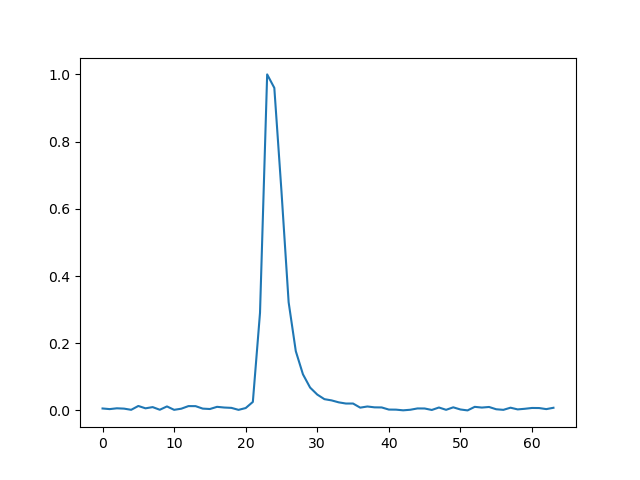

In [287]:
%matplotlib widget
plt.plot(pulseTemplate)
plt.show()

In [320]:
pulse16Bits = (pulseTemplate*32767).astype('int16')
pulse16Bits.values

array([  187,   126,   205,   173,    57,   432,   202,   321,    63,
         387,    55,   165,   418,   414,   174,   135,   347,   279,
         246,    52,   229,   826,  9511, 32767, 31450, 21349, 10547,
        5777,  3519,  2225,  1543,  1095,   975,   785,   669,   669,
         268,   381,   297,   288,    80,    73,     7,    62,   191,
         187,    42,   282,    57,   299,    89,     0,   346,   276,
         333,   111,    54,   263,    97,   158,   237,   229,   125,
         256], dtype=int16)

In [289]:
%matplotlib widget
plt.plot(pulse16Bits)
plt.show()

In [291]:
max(pulse16Bits)

65535

In [319]:
pulseNegative16Bits = ((pulseTemplate)*(-32767) + 32767).astype('int16')
pulseNegative16Bits.values

array([32579, 32640, 32561, 32593, 32709, 32334, 32564, 32445, 32703,
       32379, 32711, 32601, 32348, 32352, 32592, 32631, 32419, 32487,
       32520, 32714, 32537, 31940, 23255,     0,  1316, 11417, 22219,
       26989, 29247, 30541, 31223, 31671, 31791, 31981, 32097, 32097,
       32498, 32385, 32469, 32478, 32686, 32693, 32759, 32704, 32575,
       32579, 32724, 32484, 32709, 32467, 32677, 32767, 32420, 32490,
       32433, 32655, 32712, 32503, 32669, 32608, 32529, 32537, 32641,
       32510], dtype=int16)

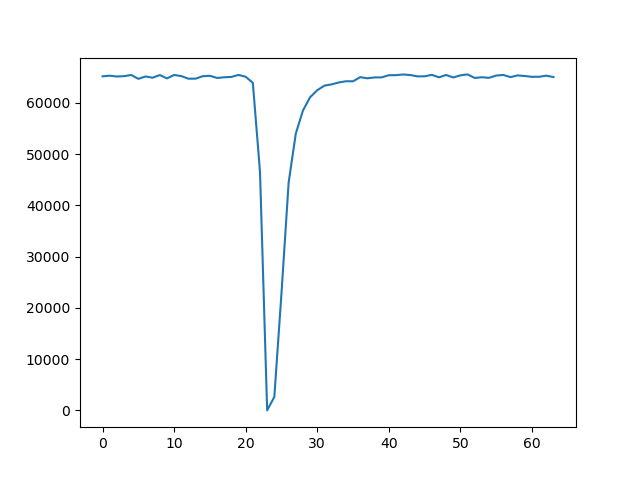

In [293]:
%matplotlib widget
plt.plot(pulseNegative16Bits)
plt.show()

## FIR coefficients computation

### Negative pulse

In [321]:
pulseNegative16BitsCentered = (pulseNegative16Bits - pulseNegative16Bits.mean()).astype('int16')
pulseNegative16BitsCentered

0     1898
1     1959
2     1880
3     1912
4     2028
      ... 
59    1927
60    1848
61    1856
62    1960
63    1829
Length: 64, dtype: int16

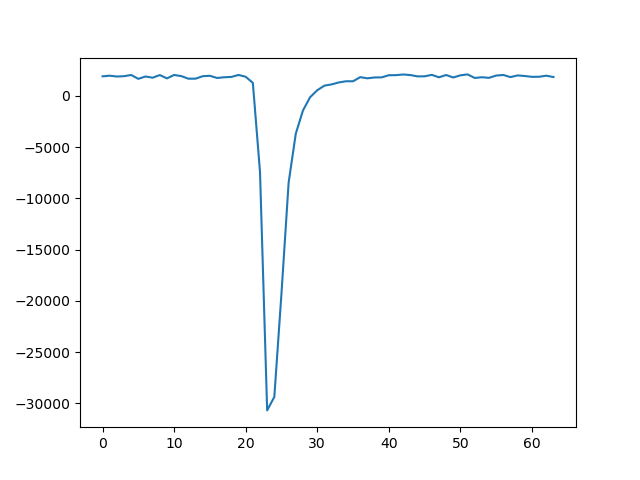

In [323]:
%matplotlib widget
plt.plot(pulseNegative16BitsCentered)
plt.show()

In [328]:
pulseNegative16BitsCentered_FIR = np.flip(pulseNegative16BitsCentered.values, axis = 0)
pulseNegative16BitsCentered_FIR

array([  1829,   1960,   1856,   1848,   1927,   1988,   1822,   2031,
         1974,   1752,   1809,   1739,   2086,   1996,   1786,   2028,
         1803,   2043,   1898,   1894,   2023,   2078,   2012,   2005,
         1797,   1788,   1704,   1817,   1416,   1416,   1300,   1110,
          990,    542,   -139,  -1433,  -3691,  -8461, -19263, -29364,
       -30680,  -7425,   1259,   1856,   2033,   1839,   1806,   1738,
         1950,   1911,   1671,   1667,   1920,   2030,   1698,   2022,
         1764,   1883,   1653,   2028,   1912,   1880,   1959,   1898],
      dtype=int16)

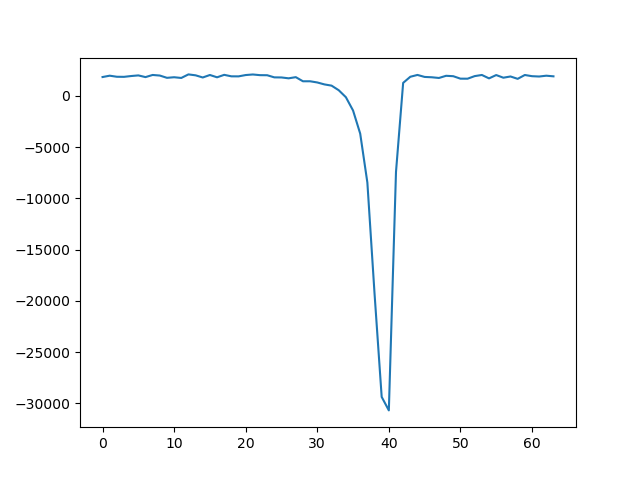

In [329]:
%matplotlib widget
plt.plot(pulseNegative16BitsCentered_FIR)
plt.show()

# Pulse simulations from double exponential model

Continuous-time pulse model

$y(t) = A\left( e^{-t/{b\tau}} - e^{-t/{(1-b)\tau}} \right) $


Which translates into discrete domain as

$y[n] = A\left( e^{-n/{b\tau}} - e^{-n/{(1-b)\tau}} \right) $

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from libs.simplifiedcorrelationindexforpsdpb.scripts.pearsonComparison import PulseSynthesis as PS

In [2]:
SINGLE_PULSE_LEN = 64
NUM_PULSES = 500
B1 = 0.1
B2 = 0.45
BETA_SEPARATION = False
BASE_NOISE = 1
SNR = BASE_NOISE*50
INT_SCALING = 128

In [3]:
pulse = PS()

In [4]:
pulseTemplate1 = pulse.pmtPulse(
    length = SINGLE_PULSE_LEN,
    amplitude = 1,
    noiseSigma = 0,
    leadingProportion = B1,
    quantizationBits = 0
)

pulseTemplate2 = pulse.pmtPulse(
    length = SINGLE_PULSE_LEN,
    amplitude = 1,
    noiseSigma = 0,
    leadingProportion = B2,
    quantizationBits = 0
)

In [5]:
pulseTemplate1 *= 32767
pulseTemplate1 = pulseTemplate1.astype('int16')

pulseTemplate2 *= 32767
pulseTemplate2 = pulseTemplate2.astype('int16')

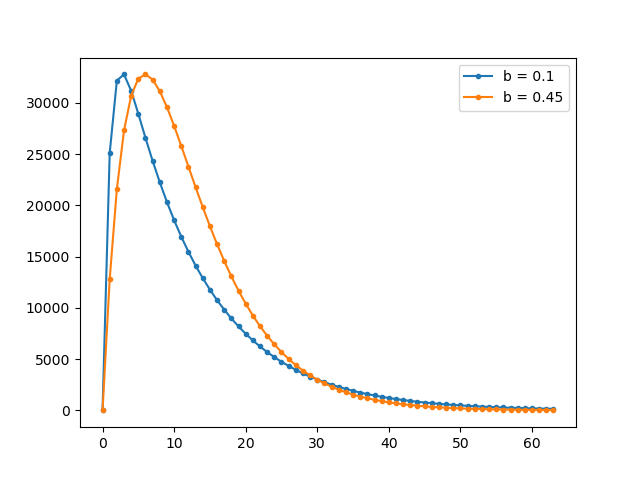

In [6]:
%matplotlib widget
plt.plot(pulseTemplate1, '.-')
plt.plot(pulseTemplate2, '.-')
plt.legend([f"b = {B1}", f"b = {B2}"])
plt.show()

In [7]:
fB1 = open('./data/pulseB1_16bits.txt', 'w')
for i in pulseTemplate1:
    fB1.write(str(str(int(i)) + ","))
fB1.close()

fB2 = open('./data/pulseB2_16bits.txt', 'w')
for i in pulseTemplate2:
    fB2.write(str(str(int(i)) + ","))
fB2.close()


In [8]:
pulseTemplate1_FIR = np.flip(pulseTemplate1)
pulseTemplate2_FIR = np.flip(pulseTemplate2)

fB1 = open('./data/pulseB1_16bits_FIR.txt', 'w')
for i in pulseTemplate1_FIR:
    fB1.write(str(str(int(i)) + ","))
fB1.close()

fB2 = open('./data/pulseB2_16bits_FIR.txt', 'w')
for i in pulseTemplate2_FIR:
    fB2.write(str(str(int(i)) + ","))
fB2.close()


In [9]:
y1, y1loc = pulse.pmtTraceWithPileup(
    nPulses = NUM_PULSES,
    pulseLength=SINGLE_PULSE_LEN,
    pulseType=pulse.pmtPulse,
    leadingProportion=B1,
    normalizedBeta = BETA_SEPARATION,
    traceNoiseSigma = BASE_NOISE,
    amplitudeFromSNR = SNR,
    leadingZeroes = True,
    returnPulseLocations= True
)


y2, y2loc = pulse.pmtTraceWithPileup(
    nPulses = NUM_PULSES,
    pulseLength=SINGLE_PULSE_LEN,
    pulseType=pulse.pmtPulse,
    leadingProportion=B2,
    normalizedBeta = BETA_SEPARATION,
    traceNoiseSigma = BASE_NOISE,
    amplitudeFromSNR = SNR,
    leadingZeroes = True,
    returnPulseLocations= True
)

y1 *= INT_SCALING
y1 = y1.astype('int16')

y2 *= INT_SCALING
y2 = y2.astype('int16')

Scaling factor for SNR: 50.0
Scaling factor for SNR: 50.0


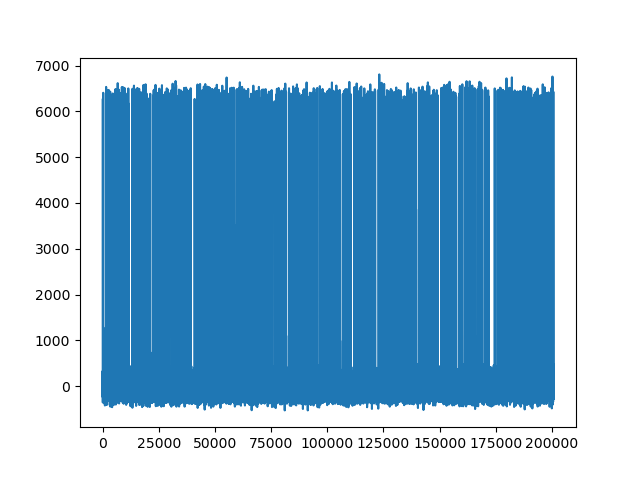

In [11]:
%matplotlib widget
plt.plot(y1)
plt.show()

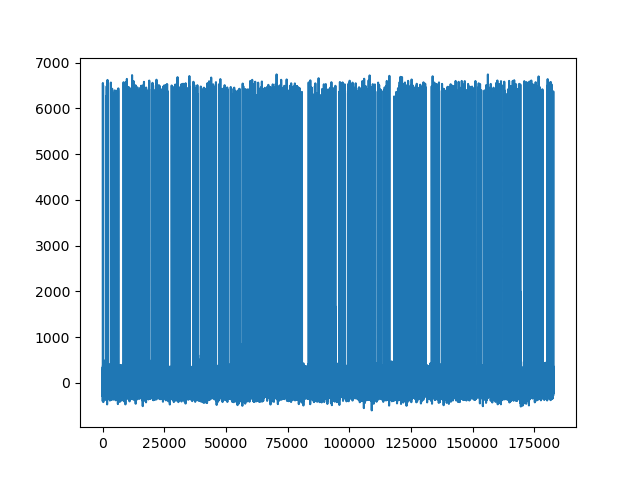

In [12]:
%matplotlib widget
plt.plot(y2)
plt.show()

In [13]:
dfTrace1 = pd.DataFrame(y1)
dfTrace2 = pd.DataFrame(y2)

In [14]:
dfTrace1.to_csv(f'./data/pulseModelB1_trace_SNR{SNR}_N{NUM_PULSES}.csv', index = False)
dfTrace2.to_csv(f'./data/pulseModelB2_trace_SNR{SNR}_N{NUM_PULSES}.csv', index = False)